In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import re

In [5]:
# Load the dataset
data_path = 'twitter_sentiment.csv'
df = pd.read_csv(data_path)


In [6]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [7]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64


In [8]:
# Drop rows with missing values (if any)
df.dropna(inplace=True)

In [11]:
# Preprocessing the text
def preprocess_text(text):
    if isinstance(text, float):  # Handle NaN or non-string values
        text = str(text)
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = text.strip()  # Remove leading/trailing whitespace
    return text



In [13]:
# Load the dataset and assign column names
df = pd.read_csv(data_path, header=None, names=['text'])

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Preprocessing and subsequent steps remain unchanged


First few rows of the dataset:
                                                                        text
2401 Borderlands Positive  im getting on borderlands and i will murder yo...
                 Positive  I am coming to the borders and I will kill you...
                 Positive  im getting on borderlands and i will kill you ...
                 Positive  im coming on borderlands and i will murder you...
                 Positive  im getting on borderlands 2 and i will murder ...


In [14]:
# Apply preprocessing
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [15]:
# Perform sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    return polarity

df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

In [16]:
# Classify sentiments as Positive, Neutral, or Negative
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment'].apply(classify_sentiment)

In [17]:
# Display sentiment distribution
print("\nSentiment distribution:")
print(df['sentiment_label'].value_counts())


Sentiment distribution:
sentiment_label
Positive    34411
Negative    21531
Neutral     19740
Name: count, dtype: int64


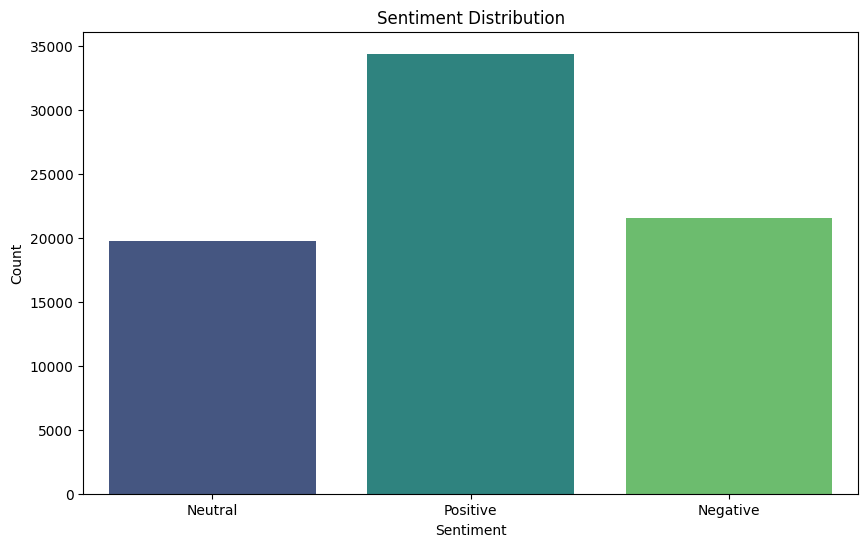

In [18]:
# Visualization
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sentiment_label', palette='viridis', hue='sentiment_label', dodge=False, legend=False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


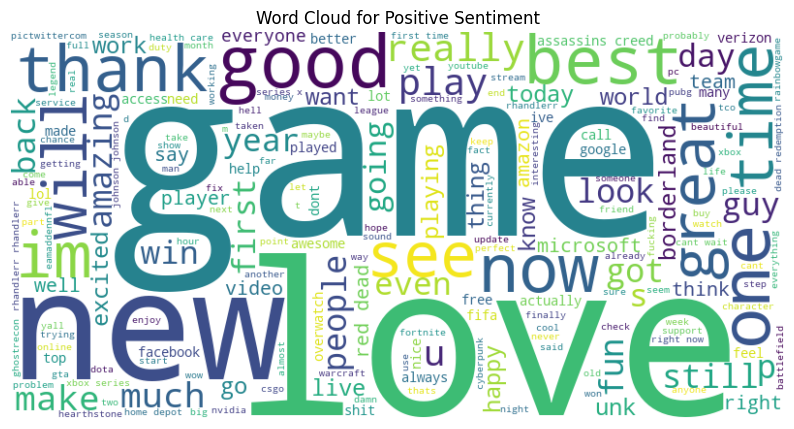

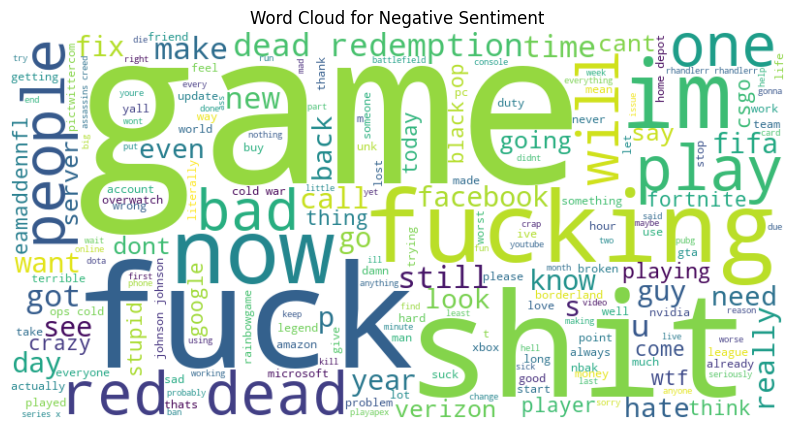

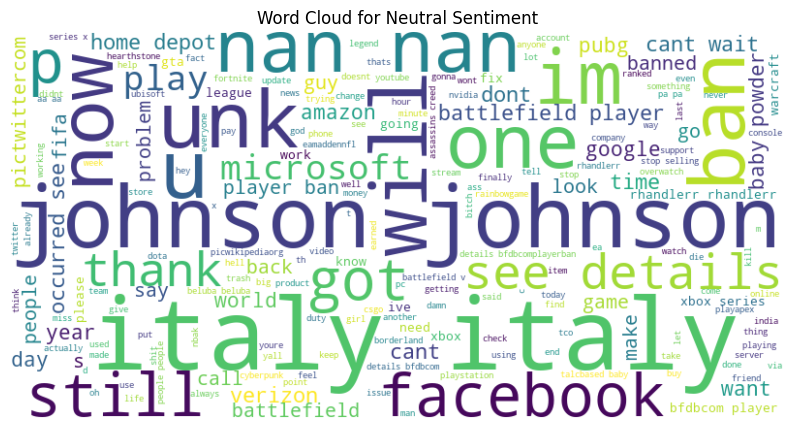

In [19]:
# Generate a word cloud for positive, negative, and neutral sentiments
for sentiment in ['Positive', 'Negative', 'Neutral']:
    text = ' '.join(df[df['sentiment_label'] == sentiment]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()

In [20]:
# Show the processed dataset
print("\nProcessed dataset:")
print(df.head())


Processed dataset:
                                                                        text  \
2401 Borderlands Positive  im getting on borderlands and i will murder yo...   
                 Positive  I am coming to the borders and I will kill you...   
                 Positive  im getting on borderlands and i will kill you ...   
                 Positive  im coming on borderlands and i will murder you...   
                 Positive  im getting on borderlands 2 and i will murder ...   

                                                                cleaned_text  \
2401 Borderlands Positive  im getting on borderlands and i will murder yo...   
                 Positive  i am coming to the borders and i will kill you...   
                 Positive  im getting on borderlands and i will kill you all   
                 Positive  im coming on borderlands and i will murder you...   
                 Positive  im getting on borderlands  and i will murder y...   

                  